In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv("E:\\full_data.csv", index_col=0, nrows=10000000)
df.info()

c:\program files\python37\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 0 to 9999999
Data columns (total 49 columns):
Patent Citation                                        int64
Age                                                    int64
Total Citations                                        int64
Tweets                                                 int64
News Mentions                                          int64
Blog Posts                                             int64
Reddit Posts                                           int64
Facebook Posts                                         int64
Google Plus Posts                                      int64
United States                                          int64
Great Britain                                          int64
Germany                                                int64
France                                                 int64
Canada                                                 int64
Italy                           

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy =  model.score(test_features, test_labels) * 100
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print(confusion_matrix(test_labels, predictions))
    print(classification_report(test_labels, predictions))

    return accuracy

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

y = df['Patent Citation'].values
X = df.drop('Patent Citation', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state = 42, max_features=None)
rfc.fit(X_train,y_train)

base_accuracy = evaluate(rfc, X_test, y_test)

Model Performance
Average Error: 0.0119 degrees.
Accuracy = 98.81%.
[[2699413   11985]
 [  23660  264942]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   2711398
           1       0.96      0.92      0.94    288602

   micro avg       0.99      0.99      0.99   3000000
   macro avg       0.97      0.96      0.97   3000000
weighted avg       0.99      0.99      0.99   3000000



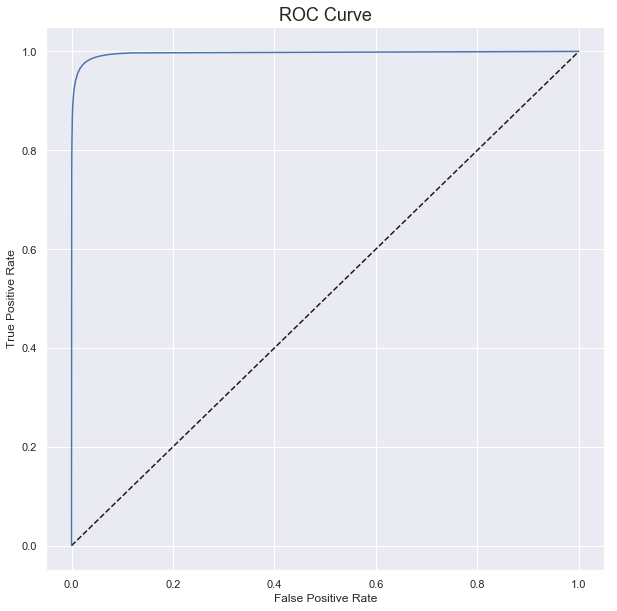

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import roc_curve

y_pred_prob = rfc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize = 18)
plt.show()

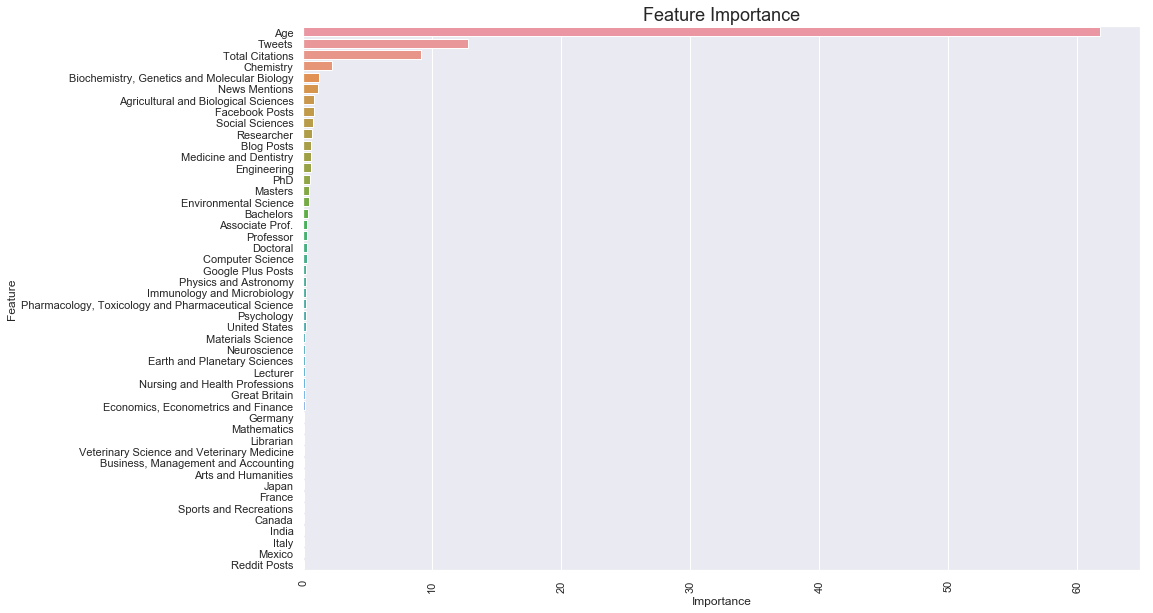

In [20]:
importances = {
    'Feature' : df.columns[1:],
    'Importance' : pd.Series(rfc.feature_importances_)
}
imp = pd.DataFrame(importances).sort_values(by='Importance', ascending=False)
imp['Importance']*=100
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.title('Feature Importance', fontsize = 18)
ax = sns.barplot(y=imp['Feature'], x=imp['Importance'])

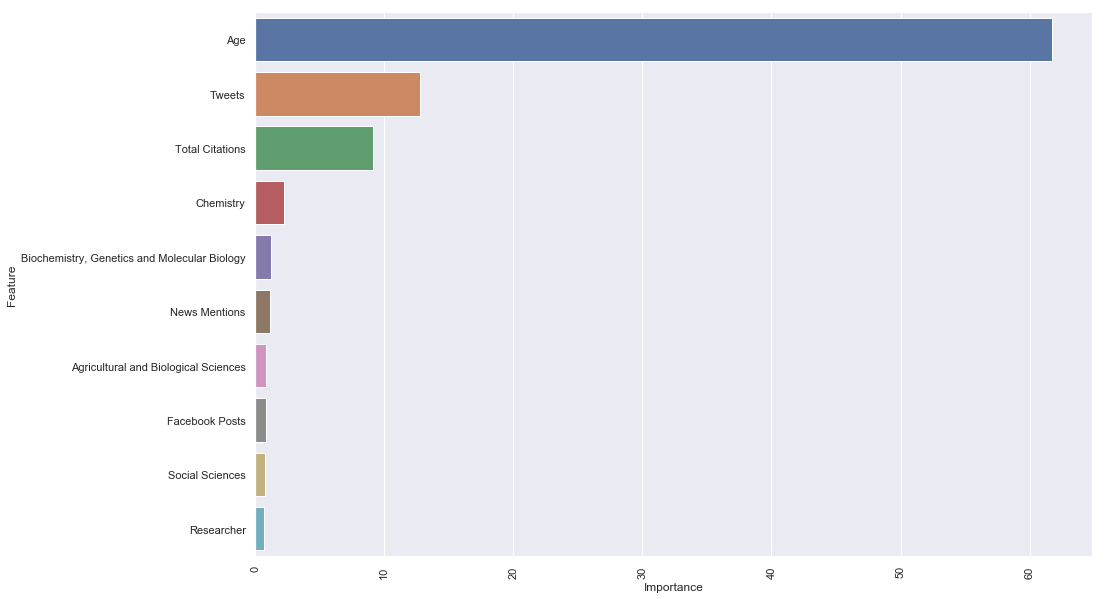

In [21]:
imp = imp.head(10)
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
ax = sns.barplot(y=imp['Feature'], x=imp['Importance'])

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(rfc,X, y,scoring='roc_auc', cv=3, n_jobs=-1)

# # Print list of AUC scores
print("AUC scores computed using 3-fold cross-validation: {}".format(cv_auc))

AUC: 0.9963475334014597


In [23]:
imp

,Feature,Importance
0,Age,61.760477
2,Tweets,12.757129
1,Total Citations,9.149589
37,Chemistry,2.241514
28,"Biochemistry, Genetics and Molecular Biology",1.247368
3,News Mentions,1.126281
27,Agricultural and Biological Sciences,0.860687
6,Facebook Posts,0.834517
33,Social Sciences,0.763823
21,Researcher,0.708165
